# AUC curves Venture Cap

In [9]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [10]:
df = pd.read_csv("Data_VC.csv")
df.head(2)

,Final_Size_USD,Fund_Number_Overall,Fund_Number_Series,GDP_yoy,TR_10yrs,yoy_MSCI,Firm_Age,Funds_Raised_Last_Year,Pcent_Increase_Funds_Last_Year,Local_Currency_USD,Local_Currency_EUR,Fund_Focus_US,Fund_Focus_Europe,Fund_Focus_Asia,Geographic_Scope_Diversified,Industry_Diversified,PME,VC_Specialized
0,-0.223341,1,1,0.655172,1.413158,-0.382939,-0.681793,-1.371857,1.071139,1,0,1,0,0,0,0,0.0,0
1,-0.295691,5,3,0.774167,0.759574,-1.441856,1.575977,0.081253,1.486316,1,0,0,1,0,0,0,0.0,0


In [11]:
def plot_AUC_curve(fpr, tpr, title):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.savefig(f"{title}_VC")
    plt.show()

In [12]:
feature_cols = df.columns[df.columns != "PME"]
X = df[feature_cols]
y = df["PME"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

In [13]:
def fpr_tpr(name, model):
    model = model
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
    plot_AUC_curve(fpr, tpr, name)

In [14]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC(kernel='linear', probability=True, random_state=0)))

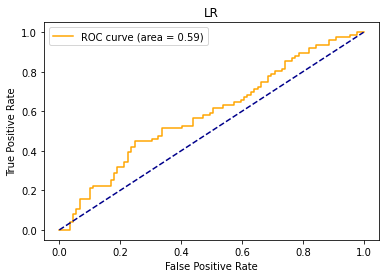

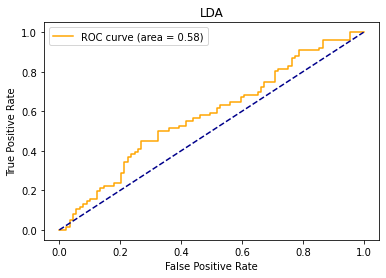

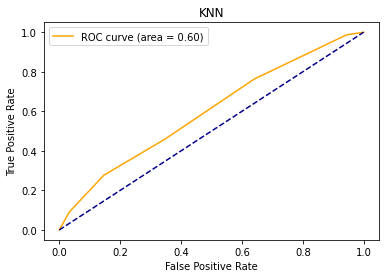

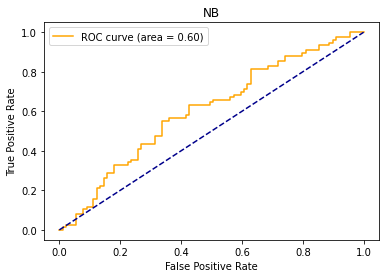

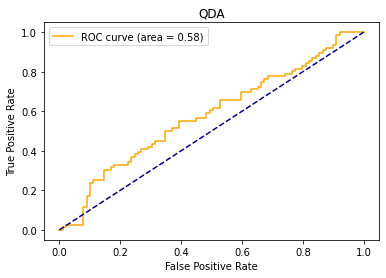

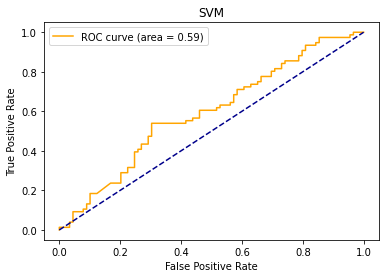

In [15]:
# printing curves
for name,model in models:
    fpr_tpr(name,model)

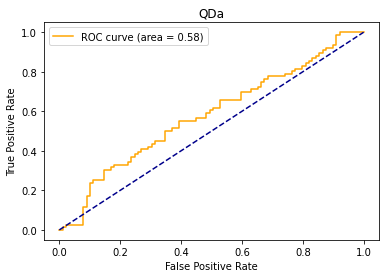

In [16]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_prob3 = qda.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
plot_AUC_curve(fpr3, tpr3, "QDa")